# 案例：配对交易聚类

在本案例研究中，我们将使用聚类方法进行配对交易策略的设计。

# 1. 问题定义

本案例研究的目标是对标准普尔 500 指数的股票进行聚类分析，并为配对交易策略找出配对股票。


# 2. 载入数据


## 2.1. 读取Python库

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import datetime

# #Import Model Packages 

# from scipy.spatial.distance import pdist
# from sklearn.metrics import adjusted_mutual_info_score
# from sklearn import cluster, covariance, manifold


#Other Helper Packages and functions
import matplotlib.ticker as ticker
from itertools import cycle

<a id='1.2'></a>
## 2.2. 读取数据

In [2]:
dataset = pd.read_csv('datasets/SP500Data.csv',index_col=0)

In [3]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

<a id='2'></a>
# 3. 探索性数据分析

<a id='2.1'></a>
## 3.1. 描述性统计

In [4]:
dataset.shape

(448, 502)

In [5]:
pd.set_option('display.width', 100)
dataset.head(5)

,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,AMG,...,WLTW,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,58.790001,98.410004,192.490005,153.839996,64.309998,177.699997,10.98,106.089996,10.88,203.039993,...,146.990005,164.300003,47.810001,29.370001,67.879997,68.070000,81.599998,124.059998,50.700001,71.769997
2018-01-03,58.919998,99.949997,195.820007,154.550003,65.309998,181.039993,11.55,107.050003,10.87,202.119995,...,149.740005,162.520004,47.490002,29.330000,69.239998,68.900002,81.529999,124.919998,50.639999,72.099998
2018-01-04,58.820000,99.379997,199.250000,156.380005,64.660004,183.220001,12.12,111.000000,10.83,198.539993,...,151.259995,163.399994,47.119999,29.690001,70.489998,69.360001,82.360001,124.739998,50.849998,72.529999
2018-01-05,58.990002,101.110001,202.320007,157.669998,66.370003,185.339996,11.88,112.180000,10.87,199.470001,...,152.229996,164.490005,46.790001,29.910000,74.150002,69.230003,82.839996,125.980003,50.869999,73.360001
2018-01-08,58.820000,99.489998,207.800003,158.929993,66.629997,185.039993,12.28,111.389999,10.87,200.529999,...,151.410004,162.300003,47.139999,30.260000,74.639999,69.480003,82.980003,126.220001,50.619999,74.239998


In [6]:
dataset.describe()

,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,AMG,...,WLTW,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBH,ZION,ZTS
count,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,...,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000
mean,70.934196,88.078013,307.303839,167.473750,59.630804,252.270603,21.804754,147.501428,14.534888,128.423750,...,165.139486,139.475335,51.671027,29.151071,90.774487,74.549040,93.492455,120.406161,49.230245,94.787232
std,9.015754,13.480891,71.989893,14.635497,13.119012,29.001055,7.425020,21.095302,2.266254,38.573308,...,17.383970,29.251895,6.650626,3.450413,21.081242,4.926937,11.958700,9.199975,4.820335,14.395919
min,56.270000,62.980000,159.309998,133.669998,40.110001,177.699997,9.530000,103.760002,10.060000,71.800003,...,134.839996,92.010002,42.130001,18.920000,62.820000,61.380001,76.300003,97.230003,38.509998,71.510002
25%,62.620001,78.657503,260.557487,157.280006,47.037500,235.377495,15.147500,133.307499,12.847500,94.059998,...,151.705002,114.085001,45.689999,27.139999,71.664999,70.547503,83.507502,114.030001,45.107500,84.557499
50%,70.014999,88.524998,301.940002,162.880005,55.269999,254.684998,21.885000,154.949997,14.830000,113.389999,...,158.809998,132.974998,49.370001,29.075000,85.195000,75.165001,89.930000,120.645000,49.184999,90.090000
75%,78.620003,96.667498,368.095001,178.337502,71.565002,272.989990,28.437500,163.614998,16.355000,158.855000,...,178.064999,164.927498,56.715001,31.455000,109.367500,78.359999,101.462500,125.850002,53.214999,101.970001
max,88.739998,123.209999,449.750000,201.119995,83.389999,311.269989,34.389999,184.720001,18.410000,215.759995,...,199.360001,201.509995,65.820000,36.480000,139.720001,84.410004,119.209999,142.610001,58.540001,128.470001


<a id='3'></a>
## 4. 数据预处理

<a id='3.1'></a>
## 4.1. 数据清洗
我们会检查各行中的 NA，要么删除它们，要么用列的平均值来填充它们。

In [7]:
print('Null Values =',dataset.isnull().values.any())

Null Values = True


删除缺失值超过 30% 的列，同时，如果存在空值，则删除包含空值的行

In [8]:
missing_fractions = dataset.isnull().mean().sort_values(ascending=False)

missing_fractions.head(10)

drop_list = sorted(list(missing_fractions[missing_fractions > 0.3].index))

dataset.drop(labels=drop_list, axis=1, inplace=True)
dataset.shape

(448, 498)

用数据集中的上一个可用值填补缺失值

In [9]:
dataset=dataset.fillna(method='ffill')
dataset.head(2)

,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,AMG,...,WLTW,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,58.790001,98.410004,192.490005,153.839996,64.309998,177.699997,10.98,106.089996,10.88,203.039993,...,146.990005,164.300003,47.810001,29.370001,67.879997,68.070000,81.599998,124.059998,50.700001,71.769997
2018-01-03,58.919998,99.949997,195.820007,154.550003,65.309998,181.039993,11.55,107.050003,10.87,202.119995,...,149.740005,162.520004,47.490002,29.330000,69.239998,68.900002,81.529999,124.919998,50.639999,72.099998


<a id='3.2'></a>
## 4.2. 数据转换

为了进行聚类分析，我们将使用年度收益率和方差作为变量，因为它们是股票表现及其波动性的指标。让我们从数据中准备收益率和波动性变量。

计算在理论上的一年期间的平均年百分比收益率和波动率。

In [10]:
returns = dataset.pct_change().mean() * 252
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns['Volatility'] = dataset.pct_change().std() * np.sqrt(252)
data=returns

将数据格式化为一个 numpy 数组，以便输入到 K-Means 算法中。

在应用聚类之前，所有变量应该在相同的尺度上，否则具有较大值的特征会主导结果。我们使用 sklearn 中的 StandardScaler 将数据集的特征标准化到单位尺度上（均值 = 0，方差 = 1）。

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(data)
rescaledDataset = pd.DataFrame(scaler.fit_transform(data),columns = data.columns, index = data.index)

In [12]:
rescaledDataset.head(2)
X=rescaledDataset
X.head(2)

,Returns,Volatility
ABT,0.794067,-0.702741
ABBV,-0.927603,0.794867


参数 clusters 是指标，而用于聚类的变量是列。因此，数据格式正确，可以输入到聚类算法中。

<a id='4'></a>
# 5. 评估算法和模型

<a id='5.1'></a>
## 5.1. K-Means 聚类


<a id='5.1.2'></a>
### 5.1 聚类和可视化

让我们使用六个聚类构建 K-Means 模型，并可视化结果。

In [13]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=6, random_state=0)
model.fit(X)
centers_init = model.cluster_centers_

In [14]:
#Extracting labels 
target_labels = model.predict(X)

当数据集中的变量/维度非常多时，要可视化聚类形成的方式并不容易。其中一种方法是在二维空间中可视化聚类。

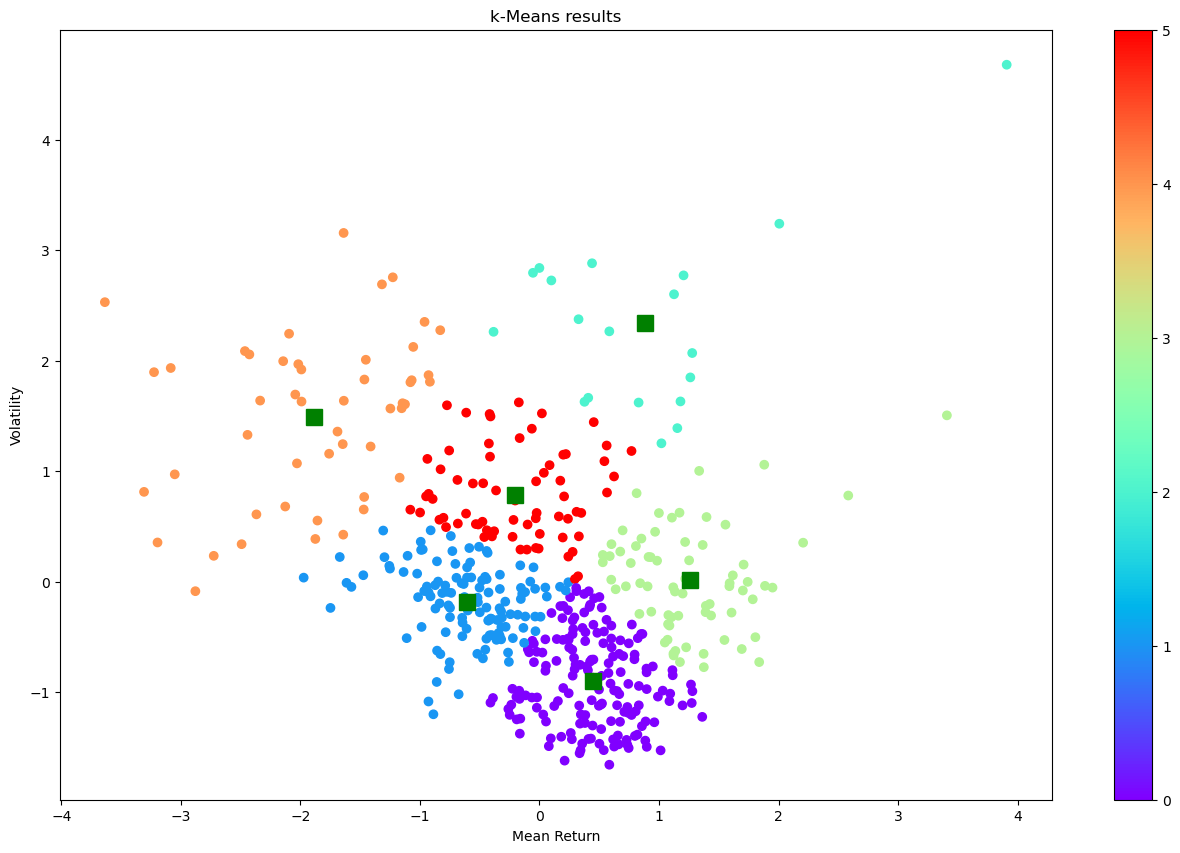

In [15]:
centroids = model.cluster_centers_
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:,0],X.iloc[:,1], c = model.labels_, cmap ="rainbow", label = X.index)
ax.set_title('k-Means results')
ax.set_xlabel('Mean Return')
ax.set_ylabel('Volatility')
plt.colorbar(scatter)

plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=11)

Let us check the elements of the clusters

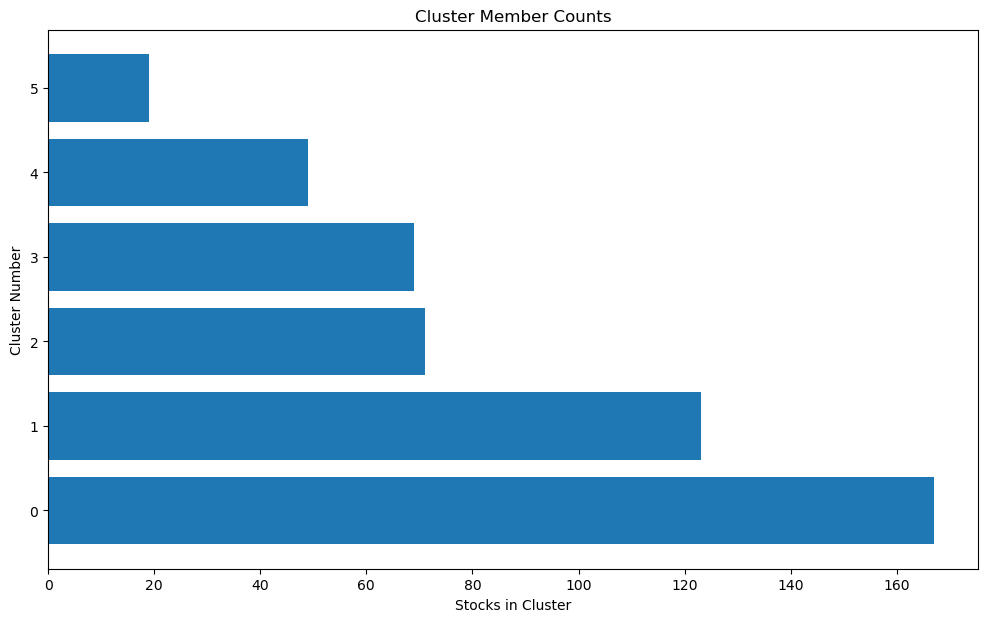

In [16]:
# show number of stocks in each cluster
clustered_series = pd.Series(index=X.index, data=model.labels_.flatten())
# clustered stock with its cluster label
clustered_series_all = pd.Series(index=X.index, data=model.labels_.flatten())
clustered_series = clustered_series[clustered_series != -1]

plt.figure(figsize=(12,7))
plt.barh(
    range(len(clustered_series.value_counts())), # cluster labels, y axis
    clustered_series.value_counts()
)
plt.title('Cluster Member Counts')
plt.xlabel('Stocks in Cluster')
plt.ylabel('Cluster Number')
plt.show()

每个聚类中的股票数量大约在40到120之间。虽然分布不均匀，但每个聚类中都有相当数量的股票。

In [29]:
clustered_series = pd.Series(index=X.index, data=model.fit_predict(X).flatten())

In [30]:
clustered_series_all = pd.Series(index=X.index,data=model.fit_predict(X).flatten())
clustered_series = clustered_series[clustered_series != -1] # get the number of stocks in each cluster
counts = clustered_series.value_counts()

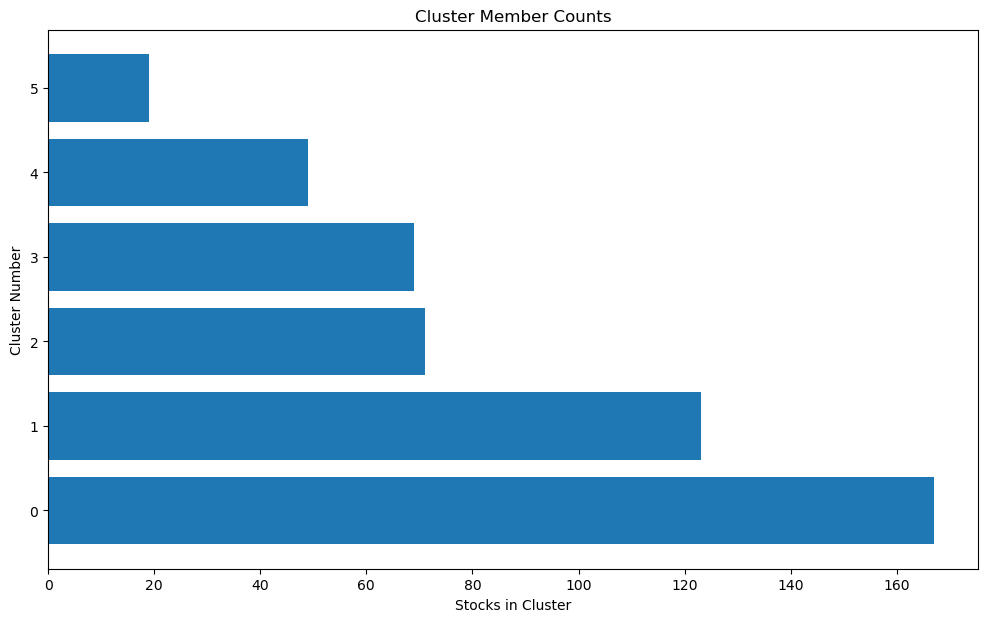

In [34]:
# get the number of stocks in each cluster
clustered_series = pd.Series(index=X.index, data=model.labels_.flatten())
clustered_series_ap = clustered_series_ap[clustered_series != -1]

plt.figure(figsize=(12,7))
plt.barh(
    range(len(clustered_series_ap.value_counts())), # cluster labels, y axis
    clustered_series_ap.value_counts()
)
plt.title('Cluster Member Counts')
plt.xlabel('Stocks in Cluster')
plt.ylabel('Cluster Number')
plt.show()


In [36]:
counts = clustered_series.value_counts()

# let's visualize some clusters
cluster_vis_list = list(counts[(counts<25) & (counts>1)].index)[::-1]
cluster_vis_list

[2]

In [37]:
CLUSTER_SIZE_LIMIT = 9999
counts = clustered_series.value_counts()
ticker_count_reduced = counts[(counts>1) & (counts<=CLUSTER_SIZE_LIMIT)]
print ("Clusters formed: %d" % len(ticker_count_reduced))
print ("Pairs to evaluate: %d" % (ticker_count_reduced*(ticker_count_reduced-1)).sum())

Clusters formed: 6
Pairs to evaluate: 55084


<Figure size 1200x700 with 0 Axes>

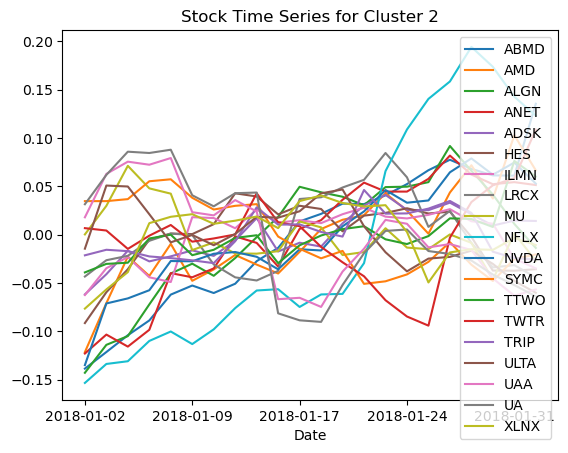

In [38]:
# let's visualize some clusters
cluster_vis_list = list(counts[(counts<25) & (counts>1)].index)[::-1]
cluster_vis_list
# plot a handful of the smallest clusters
plt.figure(figsize=(12, 7))
cluster_vis_list[0:min(len(cluster_vis_list), 4)]
for clust in cluster_vis_list[0:min(len(cluster_vis_list), 4)]: 
    tickers =list(clustered_series[clustered_series==clust].index)
    # calculate the return (lognormal) of the stocks
    means = np.log(dataset.loc[:"2018-02-01", tickers].mean()) 
    data = np.log(dataset.loc[:"2018-02-01",tickers]).sub(means)
    data.plot(title='Stock Time Series for Cluster %d' % clust)
    plt.show()

从上面的图表来看，在所有具有少量股票的聚类中，我们看到不同聚类下的股票有着相似的运动，这证实了聚类技术的有效性。

<a id='6'></a>
# 6. 配对选择

一旦创建了聚类，可以在聚类内的股票上应用多种基于协整的统计技术来创建配对。如果两个或多个时间序列是非平稳的并且趋向于一起移动，那么它们被认为是协整的。通过几种统计技术，包括Augmented Dickey-Fuller test 和 the Johansen test，可以验证时间序列之间的协整性。

在这一步中，我们扫描聚类内的证券列表，并测试配对之间的协整性。首先，我们编写一个函数，返回一个协整性测试分数矩阵、一个 p 值矩阵，以及任何 p 值小于 0.05 的配对

## 6.1. 协整和配对选择函数

In [39]:
def find_cointegrated_pairs(data, significance=0.05):
    # 函数来自 https://www.quantopian.com/lectures/introduction-to-pairs-trading
    n = data.shape[1]    
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(1):
        for j in range(i+1, n):
            S1 = data[keys[i]]            
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < significance:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

In [40]:
from statsmodels.tsa.stattools import coint
cluster_dict = {}
for i, which_clust in enumerate(ticker_count_reduced.index):
    tickers = clustered_series[clustered_series == which_clust].index   
    score_matrix, pvalue_matrix, pairs = find_cointegrated_pairs(
        dataset[tickers]
    )
    cluster_dict[which_clust] = {}
    cluster_dict[which_clust]['score_matrix'] = score_matrix
    cluster_dict[which_clust]['pvalue_matrix'] = pvalue_matrix
    cluster_dict[which_clust]['pairs'] = pairs

In [41]:
pairs = []
for clust in cluster_dict.keys():
    pairs.extend(cluster_dict[clust]['pairs'])

In [42]:
print ("Number of pairs found : %d" % len(pairs))
print ("In those pairs, there are %d unique tickers." % len(np.unique(pairs)))

Number of pairs found : 41
In those pairs, there are 46 unique tickers.


In [43]:
pairs

[('ABT', 'AEE'),
 ('ABT', 'AEP'),
 ('ABT', 'AWK'),
 ('ABT', 'AON'),
 ('ABT', 'AIV'),
 ('ABT', 'AJG'),
 ('ABT', 'ATO'),
 ('ABT', 'AVB'),
 ('ABT', 'CMS'),
 ('ABT', 'ED'),
 ('ABT', 'COO'),
 ('ABT', 'DTE'),
 ('ABT', 'FRT'),
 ('ABT', 'HCP'),
 ('ABT', 'HOLX'),
 ('ABT', 'KMB'),
 ('ABT', 'MCD'),
 ('ABT', 'NI'),
 ('ABT', 'PNW'),
 ('ABT', 'PG'),
 ('ABT', 'PEG'),
 ('ABT', 'REG'),
 ('ABT', 'RSG'),
 ('ABT', 'TMUS'),
 ('ABT', 'UDR'),
 ('ABT', 'VTR'),
 ('ABT', 'WELL'),
 ('ABT', 'XEL'),
 ('A', 'WAT'),
 ('ADBE', 'ADI'),
 ('ADBE', 'AZO'),
 ('ADBE', 'CDNS'),
 ('ADBE', 'CMG'),
 ('ADBE', 'ROST'),
 ('ADBE', 'TSCO'),
 ('ADBE', 'VFC'),
 ('ABBV', 'BWA'),
 ('AMG', 'AAL'),
 ('AMG', 'DD'),
 ('AMG', 'FCX'),
 ('AMG', 'NLSN')]

<a id='6.2'></a>
## 6.2. 配对可视化

让我们现在可视化配对选择过程的结果。

下图显示了 K-Means 在发现非传统配对方面的强度（在可视化中用箭头指出）。DXC 是 DXC Technology 的股票代码，XEC 是 Cimarex Energy 的股票代码。这两支股票来自不同的行业，在表面上看似乎没有共同之处，但它们被识别为配对，使用了 K-Means 聚类和协整性测试。这意味着它们之间的股价走势存在长期稳定的关系。

In [44]:
from sklearn.manifold import TSNE
import matplotlib.cm as cm
stocks = np.unique(pairs)
X_df = pd.DataFrame(index=X.index, data=X).T

In [45]:
in_pairs_series = clustered_series.loc[stocks]
stocks = list(np.unique(pairs))
X_pairs = X_df.T.loc[stocks]

In [46]:
X_tsne = TSNE(learning_rate=50, perplexity=3, random_state=1337).fit_transform(X_pairs)

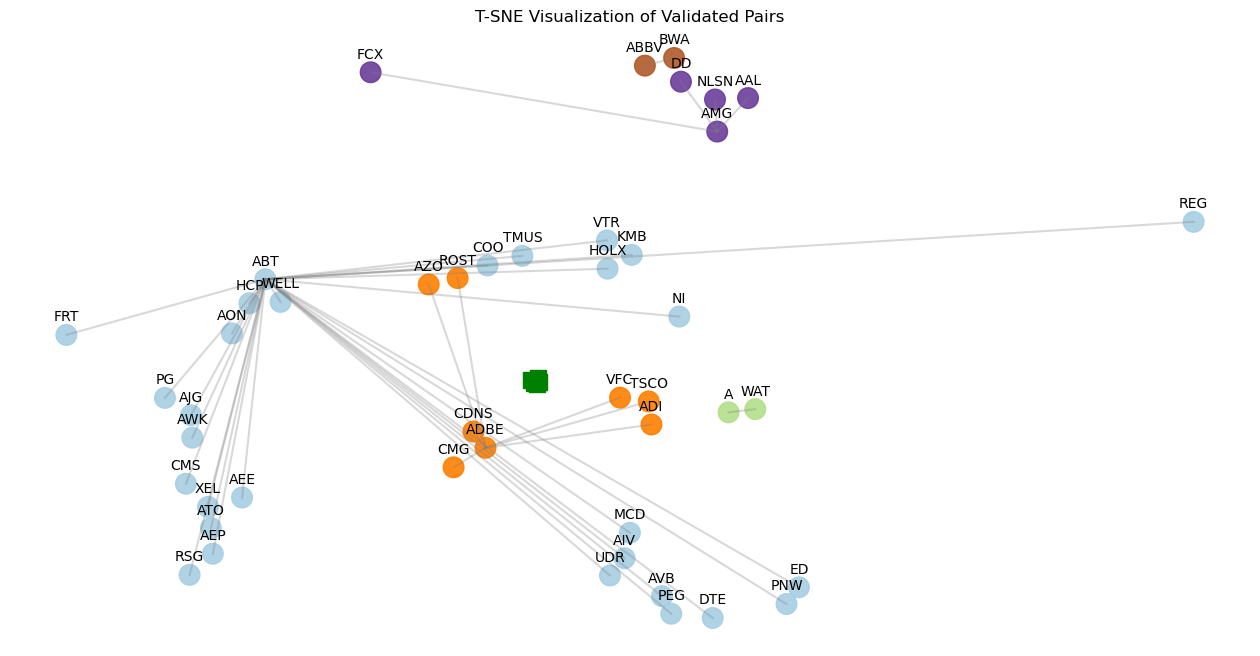

In [47]:
plt.figure(1, facecolor='white',figsize=(16,8))
plt.clf()
plt.axis('off')
for pair in pairs:
    #print(pair[0])
    ticker1 = pair[0]
    loc1 = X_pairs.index.get_loc(pair[0])
    x1, y1 = X_tsne[loc1, :]
    #print(ticker1, loc1)

    ticker2 = pair[0]
    loc2 = X_pairs.index.get_loc(pair[1])
    x2, y2 = X_tsne[loc2, :]
      
    plt.plot([x1, x2], [y1, y2], 'k-', alpha=0.3, c='gray');
    
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], s=220, alpha=0.9, c=in_pairs_series.values, cmap=cm.Paired)
plt.title('T-SNE Visualization of Validated Pairs'); 

# zip joins x and y coordinates in pairs
for x,y,name in zip(X_tsne[:,0],X_tsne[:,1],X_pairs.index):

    label = name

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    
plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=11)


一旦配对形成，它们就可以用于配对交易策略。当配对的股票价格偏离了确定的长期关系时，投资者会寻求在表现不佳的证券中建立多头头寸，并卖空表现优异的证券。如果证券回归到它们的历史关系，那么从价格的收敛中获利。

## **结论**

聚类技术并不直接帮助股票趋势预测。然而，它们可以在投资组合构建中有效地用于找到合适的配对，最终有助于风险缓解，并且可以实现更优秀的风险调整回报。

聚类可以有效地用于将股票划分为具有“相似特征”的组，用于许多其他类型的交易策略，并且可以帮助投资组合构建，以确保我们选择了一个具有足够分散性的股票池。